In [50]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("train.csv")

In [51]:
df


,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales
0,1,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600
1,2,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400
2,3,CA-2017-138688,12/06/2017,16/06/2017,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036.0,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200
3,4,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775
4,5,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9795,9796,CA-2017-125920,21/05/2017,28/05/2017,Standard Class,SH-19975,Sally Hughsby,Corporate,United States,Chicago,Illinois,60610.0,Central,OFF-BI-10003429,Office Supplies,Binders,"Cardinal HOLDit! Binder Insert Strips,Extra St...",3.7980
9796,9797,CA-2016-128608,12/01/2016,17/01/2016,Standard Class,CS-12490,Cindy Schnelling,Corporate,United States,Toledo,Ohio,43615.0,East,OFF-AR-10001374,Office Supplies,Art,"BIC Brite Liner Highlighters, Chisel Tip",10.3680
9797,9798,CA-2016-128608,12/01/2016,17/01/2016,Standard Class,CS-12490,Cindy Schnelling,Corporate,United States,Toledo,Ohio,43615.0,East,TEC-PH-10004977,Technology,Phones,GE 30524EE4,235.1880
9798,9799,CA-2016-128608,12/01/2016,17/01/2016,Standard Class,CS-12490,Cindy Schnelling,Corporate,United States,Toledo,Ohio,43615.0,East,TEC-PH-10000912,Technology,Phones,Anker 24W Portable Micro USB Car Charger,26.3760


In [52]:
#Top 10 cities by number of orders

df['City'].value_counts().sort_values(ascending=False).head(10)

,count
City,
New York City,891
Los Angeles,728
Philadelphia,532
San Francisco,500
Seattle,426
Houston,374
Chicago,308
Columbus,221
San Diego,170


In [53]:
df['Order Date'] = pd.to_datetime(df['Order Date'], dayfirst=True)
df['Ship Date'] = pd.to_datetime(df['Ship Date'], dayfirst=True)

df

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales
0,1,CA-2017-152156,2017-11-08,2017-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600
1,2,CA-2017-152156,2017-11-08,2017-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400
2,3,CA-2017-138688,2017-06-12,2017-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036.0,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200
3,4,US-2016-108966,2016-10-11,2016-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775
4,5,US-2016-108966,2016-10-11,2016-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9795,9796,CA-2017-125920,2017-05-21,2017-05-28,Standard Class,SH-19975,Sally Hughsby,Corporate,United States,Chicago,Illinois,60610.0,Central,OFF-BI-10003429,Office Supplies,Binders,"Cardinal HOLDit! Binder Insert Strips,Extra St...",3.7980
9796,9797,CA-2016-128608,2016-01-12,2016-01-17,Standard Class,CS-12490,Cindy Schnelling,Corporate,United States,Toledo,Ohio,43615.0,East,OFF-AR-10001374,Office Supplies,Art,"BIC Brite Liner Highlighters, Chisel Tip",10.3680
9797,9798,CA-2016-128608,2016-01-12,2016-01-17,Standard Class,CS-12490,Cindy Schnelling,Corporate,United States,Toledo,Ohio,43615.0,East,TEC-PH-10004977,Technology,Phones,GE 30524EE4,235.1880
9798,9799,CA-2016-128608,2016-01-12,2016-01-17,Standard Class,CS-12490,Cindy Schnelling,Corporate,United States,Toledo,Ohio,43615.0,East,TEC-PH-10000912,Technology,Phones,Anker 24W Portable Micro USB Car Charger,26.3760


In [54]:
#  Standardize text columns
df['Segment'] = df['Segment'].str.lower().str.strip()
df['Ship Mode'] = df['Ship Mode'].str.lower().str.strip()
df


,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales
0,1,CA-2017-152156,2017-11-08,2017-11-11,second class,CG-12520,Claire Gute,consumer,United States,Henderson,Kentucky,42420.0,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600
1,2,CA-2017-152156,2017-11-08,2017-11-11,second class,CG-12520,Claire Gute,consumer,United States,Henderson,Kentucky,42420.0,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400
2,3,CA-2017-138688,2017-06-12,2017-06-16,second class,DV-13045,Darrin Van Huff,corporate,United States,Los Angeles,California,90036.0,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200
3,4,US-2016-108966,2016-10-11,2016-10-18,standard class,SO-20335,Sean O'Donnell,consumer,United States,Fort Lauderdale,Florida,33311.0,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775
4,5,US-2016-108966,2016-10-11,2016-10-18,standard class,SO-20335,Sean O'Donnell,consumer,United States,Fort Lauderdale,Florida,33311.0,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9795,9796,CA-2017-125920,2017-05-21,2017-05-28,standard class,SH-19975,Sally Hughsby,corporate,United States,Chicago,Illinois,60610.0,Central,OFF-BI-10003429,Office Supplies,Binders,"Cardinal HOLDit! Binder Insert Strips,Extra St...",3.7980
9796,9797,CA-2016-128608,2016-01-12,2016-01-17,standard class,CS-12490,Cindy Schnelling,corporate,United States,Toledo,Ohio,43615.0,East,OFF-AR-10001374,Office Supplies,Art,"BIC Brite Liner Highlighters, Chisel Tip",10.3680
9797,9798,CA-2016-128608,2016-01-12,2016-01-17,standard class,CS-12490,Cindy Schnelling,corporate,United States,Toledo,Ohio,43615.0,East,TEC-PH-10004977,Technology,Phones,GE 30524EE4,235.1880
9798,9799,CA-2016-128608,2016-01-12,2016-01-17,standard class,CS-12490,Cindy Schnelling,corporate,United States,Toledo,Ohio,43615.0,East,TEC-PH-10000912,Technology,Phones,Anker 24W Portable Micro USB Car Charger,26.3760


In [55]:
# . Handle missing CustomerID
df = df.dropna(subset=['Customer ID'])

In [56]:
#  Total revenue per customer

# Calculate total revenue
total_revenue = df['Sales'].sum()
print(f"Total Revenue: ${total_revenue:,.2f}")

# Calculate and display the top 5 customers by revenue
revenue_per_customer = df.groupby('Customer ID')['Sales'].sum().sort_values(ascending=False)
print("\nTop 5 Customers by Total Revenue:")
print(revenue_per_customer.head(5))

Total Revenue: $2,261,536.78

Top 5 Customers by Total Revenue:
Customer ID
SM-20320    25043.050
TC-20980    19052.218
RB-19360    15117.339
TA-21385    14595.620
AB-10105    14473.571
Name: Sales, dtype: float64


Segment
consumer       1.148061e+06
corporate      6.884941e+05
home office    4.249822e+05
Name: Sales, dtype: float64


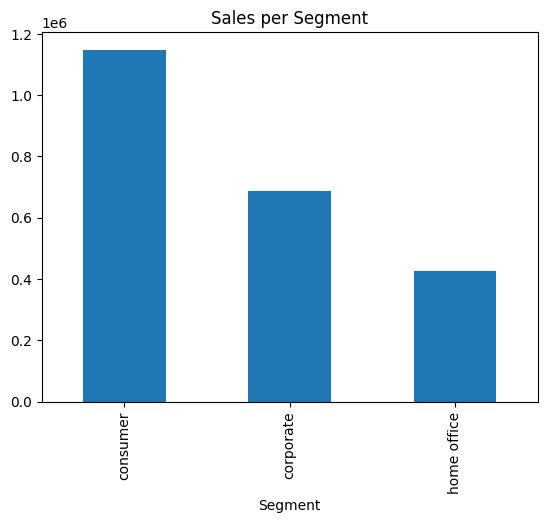

In [57]:

# Total sales per segment
sales_per_segment = df.groupby('Segment')['Sales'].sum()
print(sales_per_segment)

# Plot the total sales per segment
sales_per_segment.plot(kind='bar', title="Sales per Segment")
plt.show()

In [58]:
#total revenue per segment

# Group by 'Segment' and sum the 'Sales' column
revenue_per_segment = df.groupby('Segment')['Sales'].sum()

print("Total Revenue per Segment:")
print(revenue_per_segment)

Total Revenue per Segment:
Segment
consumer       1.148061e+06
corporate      6.884941e+05
home office    4.249822e+05
Name: Sales, dtype: float64


In [59]:
#Average order value per country (only USA here)
avg_order_country = df.groupby('Country')['Sales'].mean()
print(avg_order_country)

Country
United States    230.769059
Name: Sales, dtype: float64


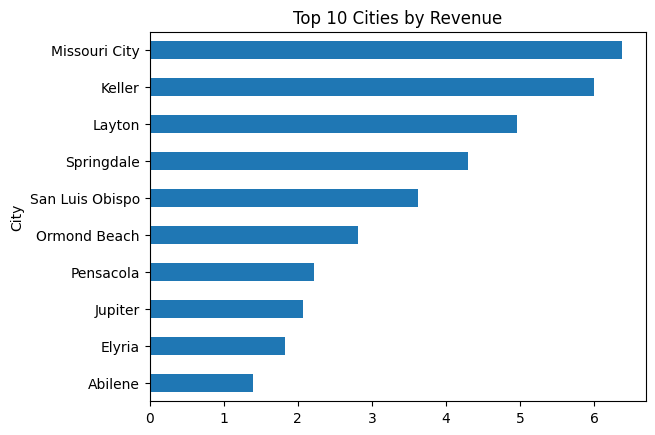

In [60]:
# 14. Total revenue per city, top 10
revenue_per_city = df.groupby('City')['Sales'].sum().sort_values(ascending=True).head(10)
revenue_per_city.plot(kind='barh', title="Top 10 Cities by Revenue")
plt.show()

/tmp/ipython-input-1567978130.py:8: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_sales = df['Sales'].resample('M').sum()


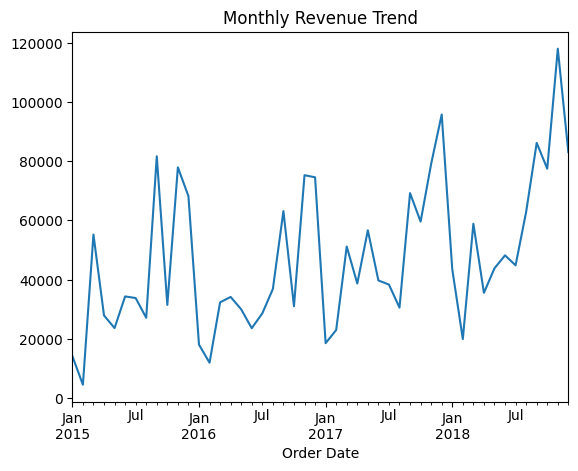

In [61]:
#  Monthly sales trends
# Reset the index to move 'Order Date' back into the columns
df.reset_index(inplace=True)

df.set_index('Order Date', inplace=True)

# Resample and plot as intended
monthly_sales = df['Sales'].resample('M').sum()
monthly_sales.plot(title="Monthly Revenue Trend")
plt.show()

/tmp/ipython-input-333945420.py:2: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  orders_per_month = df['Order ID'].resample('M').nunique()


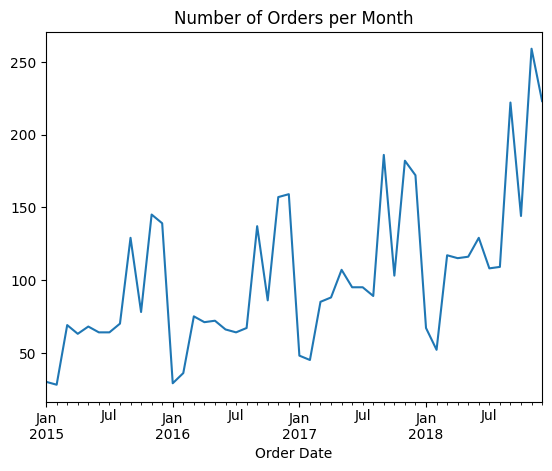

In [62]:
#  Number of orders per month
orders_per_month = df['Order ID'].resample('M').nunique()
orders_per_month.plot(title="Number of Orders per Month")
plt.show()

In [63]:
#  Average shipping time
df['Shipping Time'] = (df['Ship Date'] - df.index).dt.days
print(df['Shipping Time'].mean())

3.9611224489795918


In [64]:
#Top 10 products by revenue

top_products = df.groupby('Product Name')['Sales'].sum().sort_values(ascending=False).head(10)
print(top_products)

Product Name
Canon imageCLASS 2200 Advanced Copier                                          61599.824
Fellowes PB500 Electric Punch Plastic Comb Binding Machine with Manual Bind    27453.384
Cisco TelePresence System EX90 Videoconferencing Unit                          22638.480
HON 5400 Series Task Chairs for Big and Tall                                   21870.576
GBC DocuBind TL300 Electric Binding System                                     19823.479
GBC Ibimaster 500 Manual ProClick Binding System                               19024.500
Hewlett Packard LaserJet 3310 Copier                                           18839.686
HP Designjet T520 Inkjet Large Format Printer - 24" Color                      18374.895
GBC DocuBind P400 Electric Binding System                                      17965.068
High Speed Automatic Electric Letter Opener                                    17030.312
Name: Sales, dtype: float64


In [65]:
# Average revenue per order per segment
avg_revenue_segment = df.groupby('Segment')['Sales'].mean()
print(avg_revenue_segment)

Segment
consumer       225.065777
corporate      233.150720
home office    243.403309
Name: Sales, dtype: float64


In [66]:
#  Revenue contribution by top 20% customers
top_20_percent = int(0.2 * df['Customer ID'].nunique())
top_customers = revenue_per_customer.head(top_20_percent)
print(top_customers.sum(), "Total Revenue by Top 20% Customers")

1092156.8745 Total Revenue by Top 20% Customers


In [68]:
#  Correlation heatmap


KeyError: "['Quantity', 'Unit Price'] not in index"

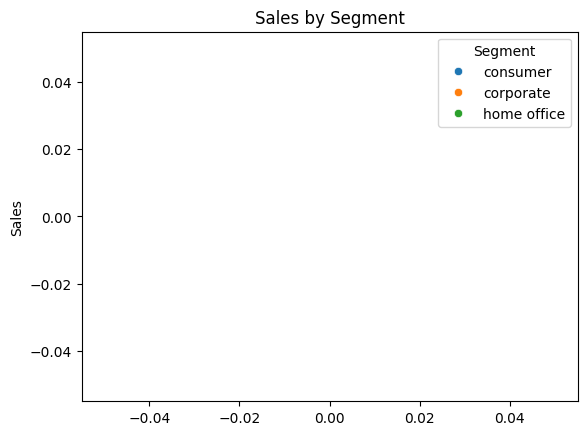

In [71]:
 #Scatter plot Sales colored by Segment
sns.scatterplot( y='Sales', hue='Segment', data=df)
plt.title("Sales by Segment")
plt.show()

/tmp/ipython-input-1756032711.py:14: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_sales = df['Sales'].resample('M').sum()


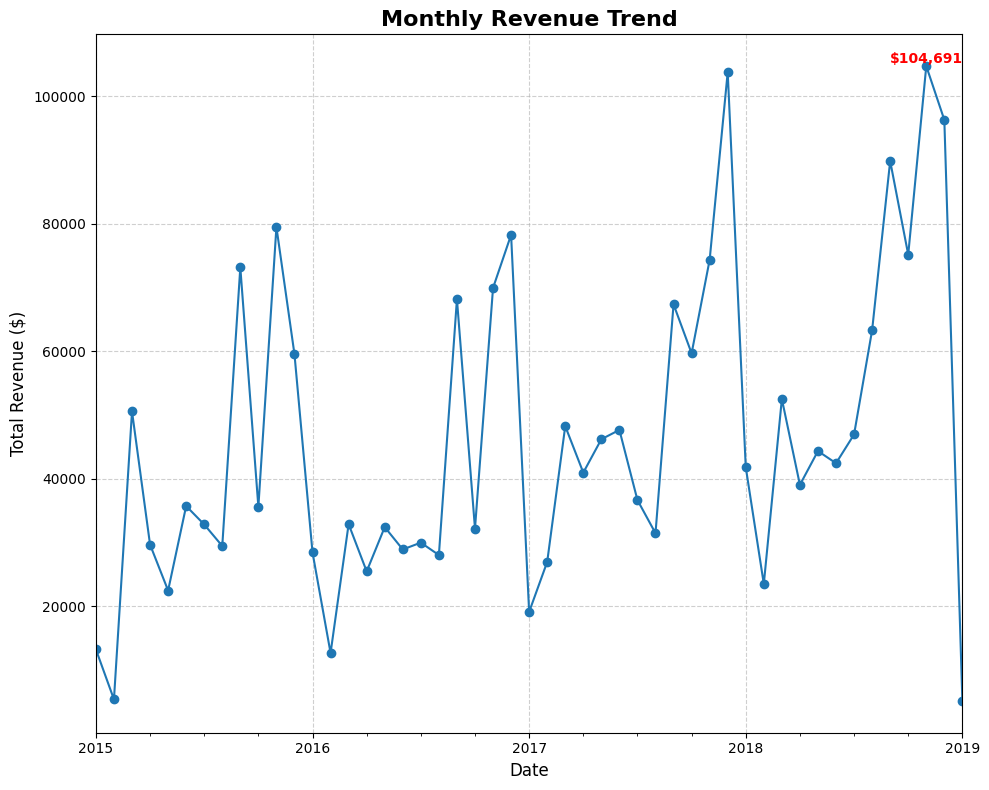

In [87]:
# 30. Line plot of monthly revenue trend with annotations


df.reset_index(inplace=True)

df['Ship Date'] = pd.to_datetime(df['Ship Date'], dayfirst=True)

# Set 'Ship Date' as the DataFrame index.
# This allows for time-series analysis using the resample() function.
df.set_index('Ship Date', inplace=True)

# Resample the 'Sales' data on a monthly basis ('M') and sum the values.
# This creates a new Series called 'monthly_sales'.
monthly_sales = df['Sales'].resample('M').sum()

#  Create the line plot with annotations.
# Use a larger figure size for better readability.
monthly_sales.plot(marker='o', figsize=(10,8))

# Add a title and labels.
plt.title("Monthly Revenue Trend", fontsize=16, fontweight='bold')
plt.xlabel("Date", fontsize=12)
plt.ylabel("Total Revenue ($)", fontsize=12)
plt.grid(True, linestyle='--', alpha=0.6)

#  Find and annotate the peak sales month.
peak_sales_value = monthly_sales.max()
peak_sales_date = monthly_sales.idxmax()

plt.text(
    peak_sales_date,
    peak_sales_value,
    f"${peak_sales_value:,.0f}",
    ha='center',
    va='bottom',
    color='red',
    fontsize=10,
    weight='bold'
)


#  Display the plot.
plt.tight_layout()
plt.show()